In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma

from volterra_conv_simulation import simulate_stochastic_convolution
from hurst_estimation import m_estimator, w_estimator
from stochastic_volatility import price_from_vol

import sys
from tqdm import tqdm

# Set here your path to vol
PATH_TO_VOL = "/home/mr_giraffe/Documents/Vega/Research/vol"
if PATH_TO_VOL not in sys.path:
    sys.path.append(PATH_TO_VOL)
import vol

### Rough Heston

$$
dS_t = S_t \sqrt{V_t} dW_t, \\
dV_t = \frac{1}{\Gamma(\alpha + 1)}(t^\alpha)*\left[\lambda(\vartheta - V_t)dt + \lambda\nu\sqrt{V_t}dB_t\right],\\
dW_tdB_t = \rho dt.
$$

In [12]:
# ToDo:
# Rewrite model as a class with parameters, simulation methods etc

In [9]:
%%time
T = 1
n = 5000
H = 0.15
N = int(np.floor(T * n) + 1)
G = gamma(H + 0.5)
lam = 2
y0 = 0.2**2
nu = 0.001
theta = 0.2**2
S0 = 100

mu = lambda x: lam * (theta - x) / G
sigma = lambda x: lam * nu * np.sqrt(np.maximum(x, 0)) / G

t_grid = np.arange(N) / n
V, dW = simulate_stochastic_convolution(T=T, 
                                        n=n, 
                                        alpha=H - 0.5, 
                                        y0=y0,
                                        mu=mu, 
                                        sigma=sigma, 
                                        kappa=3,
                                        is_positive=True)
S = price_from_vol(V, mode='var', T=T, x0=S0, rho=-0.4, dW=dW)

CPU times: user 689 ms, sys: 3.92 ms, total: 693 ms
Wall time: 200 ms


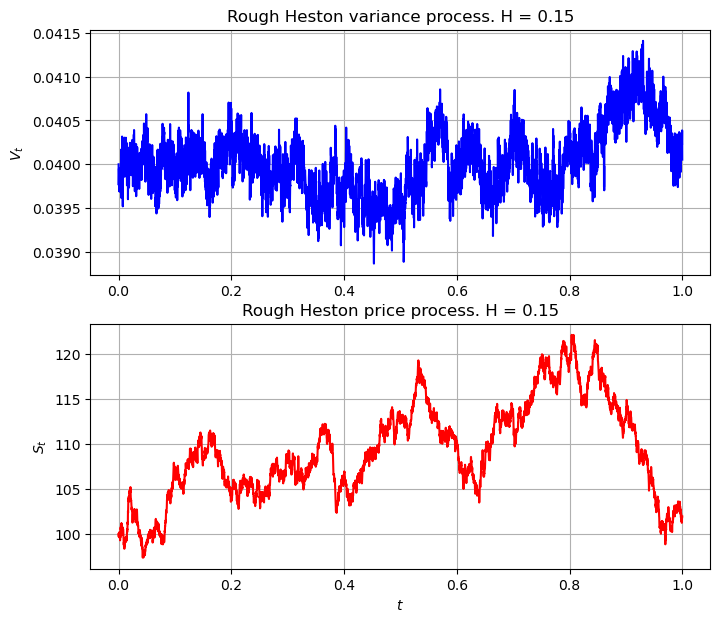

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

ax[0].plot(t_grid, V, 'b')
ax[0].set_ylabel(r"$V_t$")
ax[0].set_title(f"Rough Heston variance process. H = {H}")
ax[0].grid()

ax[1].plot(t_grid, S, 'r')
ax[1].set_xlabel(r"$t$")
ax[1].set_ylabel(r"$S_t$")
ax[1].set_title(f"Rough Heston price process. H = {H}")
ax[1].grid()

plt.show()

#### Roughness estimation

m-estimator and w-estimator results for simulated trajectory:

In [10]:
print("m-estimator =", np.round(m_estimator(np.log(V)), 3))
print("w-estimator =", np.round(w_estimator(V, 150), 3))
print("H =", H)

m-estimator = 0.126
w-estimator = 0.113
H = 0.15


### Importance of $\kappa$

In [273]:
%%time
T = 1
n = 5000
H = 0.15
N = int(np.floor(T * n) + 1)
G = gamma(H + 0.5)
lam = 2
y0 = 0.2**2
nu = 0.02
theta = 0.2**2
S0 = 100

mu = lambda x: lam * (theta - x) / G
sigma = lambda x: lam * nu * np.sqrt(np.maximum(x, 0)) / G

t_grid = np.arange(N) / n
V, dW = simulate_stochastic_convolution(T=T, 
                                        n=n, 
                                        alpha=H - 0.5, 
                                        y0=y0,
                                        mu=mu, 
                                        sigma=sigma, 
                                        kappa=0,
                                        is_positive=True)
S = price_from_vol(V, mode='var', T=T, x0=S0, rho=-0.4, dW=dW)

CPU times: user 1.04 s, sys: 15.9 ms, total: 1.06 s
Wall time: 737 ms


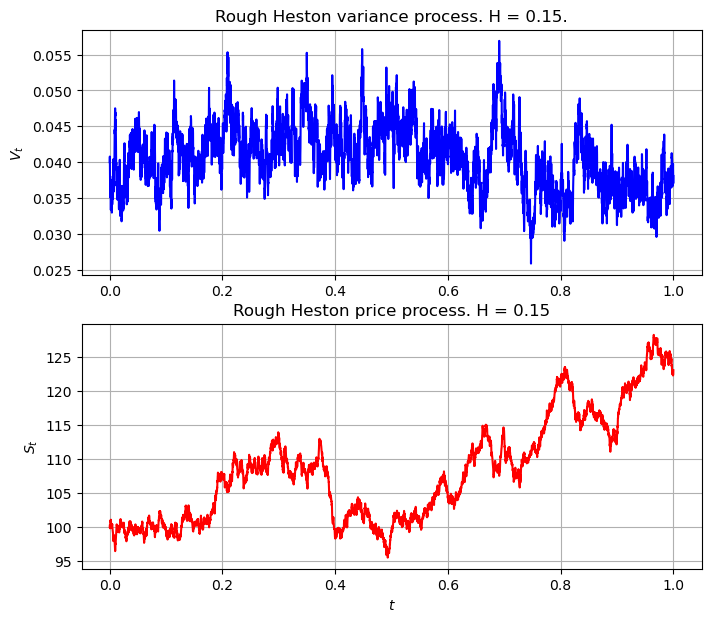

In [274]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

ax[0].plot(t_grid, V, 'b')
ax[0].set_ylabel(r"$V_t$")
ax[0].set_title(f"Rough Heston variance process. H = {H}.")
ax[0].grid()

ax[1].plot(t_grid, S, 'r')
ax[1].set_xlabel(r"$t$")
ax[1].set_ylabel(r"$S_t$")
ax[1].set_title(f"Rough Heston price process. H = {H}")
ax[1].grid()


plt.show()

#### Roughness estimation

m-estimator and w-estimator results for simulated trajectory:

In [275]:
print("m-estimator =", np.round(m_estimator(np.log(V)), 3))
print("w-estimator =", np.round(w_estimator(V, 150), 3))
print("H =", H)

m-estimator = 0.28
w-estimator = 0.272
H = 0.15


### Rough Bergomi

$$
dS_t = S_t \sqrt{V_t} dW_t, \\
V_t = \xi_0^t \exp\left\{\eta \sqrt{2\alpha+1} \int_0^t (t-s)^{\alpha} d B_s - \frac{\eta^2}{2}t^{2\alpha+1}\right\},\\
dW_tdB_t = \rho dt.
$$

The forward variance curve $\xi_0(t)$ is assumed to be flat, i.e. $\xi_0(t) = \xi$.

In [289]:
%%time
T = 1
n = 5000
H = 0.15
N = int(np.floor(T * n) + 1)
eta = 1.9
xi = 0.2**2
y0 = 0
S0 = 100

mu = 0
sigma = eta * np.sqrt(2*H)

t_grid = np.arange(N) / n
Y, dW = simulate_stochastic_convolution(T=T, 
                                        n=n, 
                                        alpha=H - 0.5, 
                                        y0=y0,
                                        mu=mu, 
                                        sigma=sigma, 
                                        kappa=5)
V = xi * np.exp(Y - 0.5 * eta**2 * t_grid**(2*H))
S = price_from_vol(V, mode='var', T=T, x0=S0, rho=-0.4, dW=dW)

CPU times: user 19.5 ms, sys: 3.79 ms, total: 23.3 ms
Wall time: 8.03 ms


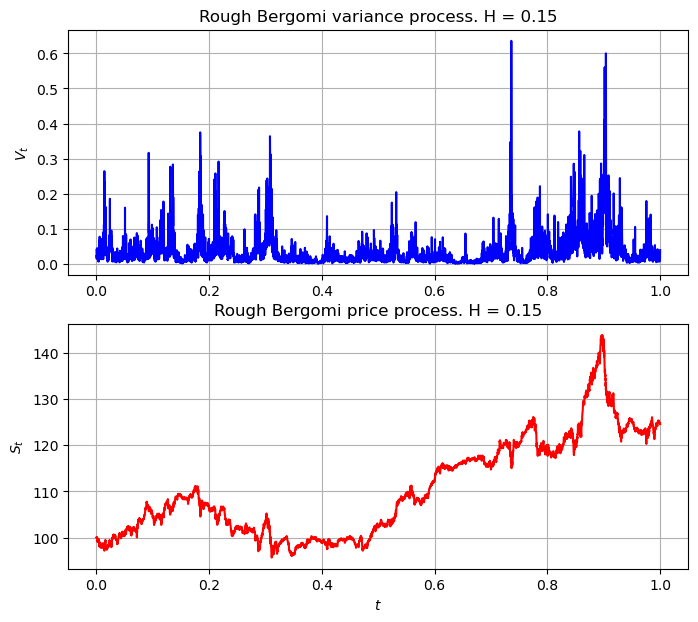

In [290]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

ax[0].plot(t_grid, V, 'b')
ax[0].set_ylabel(r"$V_t$")
ax[0].set_title(f"Rough Bergomi variance process. H = {H}")
ax[0].grid()

ax[1].plot(t_grid, S, 'r')
ax[1].set_xlabel(r"$t$")
ax[1].set_ylabel(r"$S_t$")
ax[1].set_title(f"Rough Bergomi price process. H = {H}")
ax[1].grid()


plt.show()

#### Roughness estimation

m-estimator and w-estimator results for simulated trajectory:

In [291]:
print("m-estimator =", np.round(m_estimator(np.log(V)), 3))
print("w-estimator =", np.round(w_estimator(V, 150), 3))
print("H =", H)

m-estimator = 0.143
w-estimator = 0.167
H = 0.15


## Option pricing

In [231]:
n = 5000
H = 0.15
N = int(np.floor(T * n) + 1)
eta = 1.9
xi = 0.2**2
y0 = 0
S0 = 100

mu = 0
sigma = eta * np.sqrt(2*H)

n_simulations = 10**5

In [239]:
%%time

# in years
maturities = [1/4]
log_strikes = np.linspace(-0.5, 0.5, 7)
strikes = np.exp(log_strikes) * S0

def call_payoff(S, K):
    return np.maximum(S - K, 0)

def put_payoff(S, K):
    return np.maximum(K - S, 0)

def initfn():
    np.random.seed()    
    
def get_rbergomi_payoff(i):
    Y, dW = simulate_stochastic_convolution(T=T, 
                                            n=n, 
                                            alpha=H - 0.5, 
                                            y0=y0,
                                            mu=mu, 
                                            sigma=sigma, 
                                            kappa=5)
    V = xi * np.exp(Y - 0.5 * eta**2 * t_grid**(2*H))
    S = price_from_vol(V, mode='var', T=T, x0=S0, rho=-0.4, dW=dW)
    return payoff(S[-1], K)


IVs = dict()

for T in maturities:
    N = int(np.floor(T * n) + 1)
    t_grid = np.arange(N) / n
    
    IVs[T] = list()
    
    for K in tqdm(strikes):
        payoffs = np.zeros(n_simulations)

        if S0 >= K:
            payoff = call_payoff
        else:
            payoff = put_payoff

        payoffs = list(map(get_rbergomi_payoff, range(n_simulations)))
            
        if S0 >= K:
            IVs[T].append(vol.blackscholes.call_iv(S0, 0, np.mean(payoffs), T, K))
        else:
            # used Put-Call parity here
            IVs[T].append(vol.blackscholes.call_iv(S0, 0, np.mean(payoffs) + S0 - K, T, K))

100%|████████████████████████████████████████████| 1/1 [02:40<00:00, 160.87s/it]

CPU times: user 10min 31s, sys: 12.2 s, total: 10min 43s
Wall time: 2min 40s


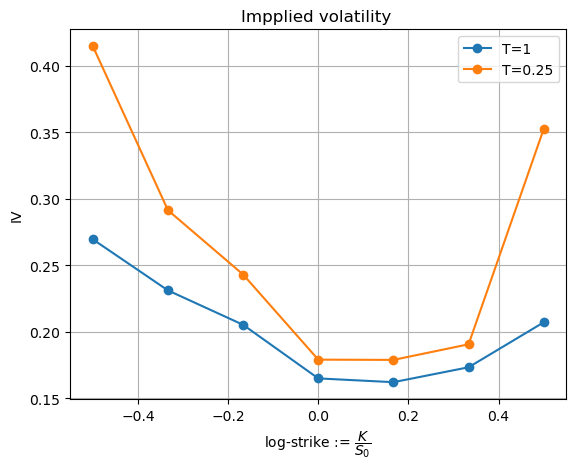

In [245]:
fig, ax =plt.subplots()

for T in IVs.keys():
    ax.plot(log_strikes, IVs[T], "o-", label=f"T={T}")
ax.legend()
ax.set_title("Impplied volatility ")
ax.set_xlabel(r"log-strike := $\dfrac{K}{S_0}$")
ax.set_ylabel(r"IV")
ax.grid()